# Objective or Steps
### 1. Extract relevant data(email bodies)
### 2. Convert format from .txt files to DataFrame
### 3. Check for empty emails
### 4. Check for null or missing values 
### 5. Remove all rows with bad data


# Imports

In [118]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt 
from os import walk
from os.path import join

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



%maplotlib inline


UsageError: Line magic function `%maplotlib` not found.


# System FileSystem

In [32]:
print(sys.getfilesystemencoding())

utf-8


# Constants

In [33]:
SPAM_1_PATH = 'spam_assassin_corpus/spam_1'
SPAM_2_PATH = 'spam_assassin_corpus/spam_2'
EASY_NONSPAM_1_PATH = 'spam_assassin_corpus/easy_ham_1'
EASY_NONSPAM_2_PATH = 'spam_assassin_corpus/easy_ham_2'
SPAM_CAT = 1
HAM_CAT = 0

DOC_JSON_FILE = 'spam_assassin_corpus/email-text-data.json'

# Generator Function for Email Body Extraction

In [34]:
def email_body_generator(path):
    
    for root, dirnames, filenames in walk(path):
        for file_name in filenames:
            
            filepath = join(root, file_name)
            stream = open(filepath, encoding='latin-1')
            
            is_body = False
            lines = []
            
            for line in  stream:
                if is_body:
                    lines.append(line)
                elif line == '\n':
                    is_body = True
                    
            stream.close()
            
            email_body = '\n'.join(lines)
 
            yield file_name, email_body
        

In [35]:
def df_from_directory(path, classification):
    rows = []
    row_names = []
    
    for file_name,email_body in email_body_generator(path):
        rows.append({'MESSAGE': email_body, 'CATEGORY': classification})
        row_names.append(file_name)
        
    return pd.DataFrame(rows, index=row_names)

In [36]:
spam_emails = df_from_directory(SPAM_1_PATH, 1)
spam_emails.head()


,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [37]:
spam_emails = df_from_directory(SPAM_1_PATH, SPAM_CAT)
spam_emails = spam_emails.append(df_from_directory(SPAM_2_PATH, SPAM_CAT))
spam_emails.head()

,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [38]:
spam_emails.shape

(1898, 2)

In [39]:
ham_emails = df_from_directory(EASY_NONSPAM_1_PATH, HAM_CAT)
ham_emails = ham_emails.append(df_from_directory(EASY_NONSPAM_2_PATH, HAM_CAT))
ham_emails.head()

,MESSAGE,CATEGORY
00001.7c53336b37003a9286aba55d2945844c,"Date: Wed, 21 Aug 2002 10:54:46 -05...",0
00002.9c4069e25e1ef370c078db7ee85ff9ac,"Martin A posted:\n\nTassos Papadopoulos, the G...",0
00003.860e3c3cee1b42ead714c5c874fe25f7,Man Threatens Explosion In Moscow \n\n\n\nThur...,0
00004.864220c5b6930b209cc287c361c99af1,Klez: The Virus That Won't Die\n\n \n\nAlready...,0
00005.bf27cdeaf0b8c4647ecd61b1d09da613,"> in adding cream to spaghetti carbonara, whi...",0


In [40]:
ham_emails.shape

(3901, 2)

In [41]:
data = pd.concat([spam_emails, ham_emails])
print('Shape entire dataframe is ', data.shape)
data.head()

Shape entire dataframe is  (5799, 2)


,MESSAGE,CATEGORY
00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1
00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1
00004.eac8de8d759b7e74154f142194282724,##############################################...,1
00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,1


In [42]:
data.tail()

,MESSAGE,CATEGORY
01396.61983fbe6ec43f55fd44e30fce24ffa6,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0
01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7,"> >-- be careful when using this one.) Also, t...",0
01398.169b51731fe569f42169ae8f948ec676,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0
01399.ca6b00b7b341bbde9a9ea3dd6a7bf896,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0
01400.f897f0931e461e7b2e964d28e927c35e,"Hi there,\n\n\n\nNow this is probably of no us...",0


# Data Cleaning: Checking for Missing values

In [43]:
# check if any message bodies are null
data.MESSAGE.isnull().values.any()

False

In [44]:
# check if there are empty emails (string length zero) 
(data.MESSAGE.str.len() == 0).any()

True

In [45]:
# check number of entries with empty emails 
(data.MESSAGE.str.len() == 0).sum()

3

In [46]:
# check number of entries with null/None values
data.MESSAGE.isnull().sum()

0

# Locate empty emails

In [47]:
type (data.MESSAGE.str.len() == 0)

pandas.core.series.Series

In [48]:
data[data.MESSAGE.str.len() == 0].index
data.index.get_loc('cmds')

array([False, False, False, ..., False, False, False])

In [49]:
# Remove empty entries from dataFrame
data.drop(['cmds'], inplace = True)

In [50]:

data[data.MESSAGE.str.len() == 0].index

Index([], dtype='object')

In [51]:
data.shape


(5796, 2)

### Add Document IDs to Track Emails in Dataset

In [52]:
document_ids = range(0, len(data.index))
data['DOC_ID'] = document_ids

In [53]:
data['FILE_NAME'] = data.index
data.set_index('DOC_ID', inplace = True)
data.head()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",1,00001.7848dde101aa985090474a91ec93fcf0
1,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00002.d94f1b97e48ed3b553b3508d116e6a09
2,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,1,00003.2ee33bc6eacdb11f38d052c44819ba6c
3,##############################################...,1,00004.eac8de8d759b7e74154f142194282724
4,I thought you might like these:\n\n1) Slim Dow...,1,00005.57696a39d7d84318ce497886896bf90d


In [54]:
data.tail()

,MESSAGE,CATEGORY,FILE_NAME
DOC_ID,,,
5791,http://news.bbc.co.uk/1/hi/england/2515127.stm...,0,01396.61983fbe6ec43f55fd44e30fce24ffa6
5792,"> >-- be careful when using this one.) Also, t...",0,01397.9f9ef4c2a8dc012d80f2ce2d3473d3b7
5793,">>>>> ""SM"" == Skip Montanaro <skip@pobox.com> ...",0,01398.169b51731fe569f42169ae8f948ec676
5794,"So then, ""Mark Hammond"" <mhammond@skippinet.co...",0,01399.ca6b00b7b341bbde9a9ea3dd6a7bf896
5795,"Hi there,\n\n\n\nNow this is probably of no us...",0,01400.f897f0931e461e7b2e964d28e927c35e


# Save a File using Pandas

In [55]:
data.to_json(DOC_JSON_FILE)

# Data Visualisation 
### Number of Spam Messages Visualised (Pie Charts)

In [56]:
data.CATEGORY.value_counts()

0    3900
1    1896
Name: CATEGORY, dtype: int64

In [57]:
amount_of_spam = data.CATEGORY.value_counts()[1]
amount_of_ham = data.CATEGORY.value_counts()[0]

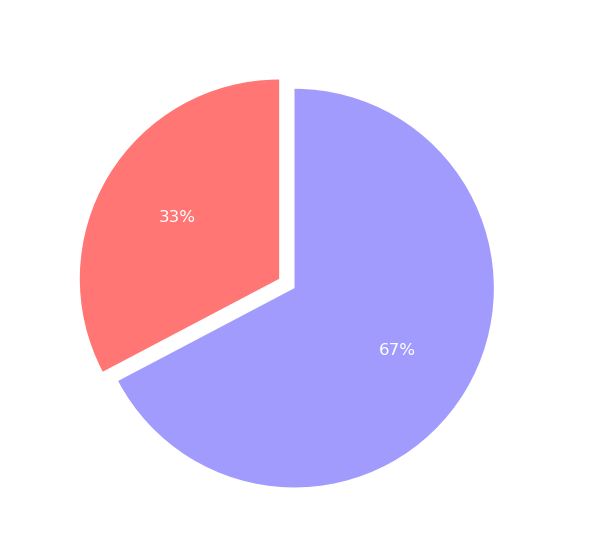

In [115]:
category_names = ['Spam', 'Legit Mail']
sizes = [amount_of_spam, amount_of_ham]
custom_colors = ['#ff7675', '#a29bfe']
explod_prop = [0,0.09]
#ff7675
#d63031
#a29bfe

plt.figure(figsize = (2.2,2.2), dpi = 300)
plt.pie(sizes, labels=category_names, textprops = {'fontsize': 4, 'color': '#fff'}, startangle=90,
autopct='%1.0f%%', colors= custom_colors,explode= explod_prop)
plt.show()


#### Donut Chart

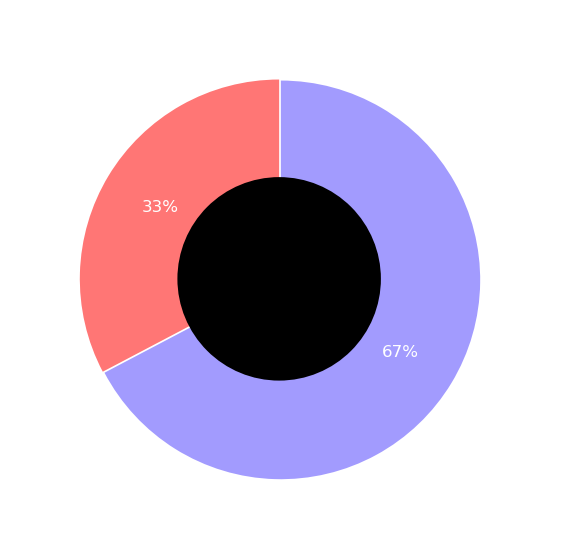

In [116]:
plt.figure(figsize = (2.2,2.2), dpi = 300)
plt.pie(sizes, labels=category_names, textprops = {'fontsize': 4, 'color': '#fff'}, startangle=90,
autopct='%1.0f%%', colors= custom_colors, pctdistance= 0.7, explode=[0, 0.01])


# Draw a circle 
centre_circle = plt.Circle((0,0), radius= 0.5, color = '#000')
plt.gca().add_artist(centre_circle)

plt.show()


# Natural Language Processing 
### Text Pre-Processing

##### 1. Converting to lower case

In [119]:
msg = 'All wor an no play makes Jack a dull boy.'
msg.lower()


'all wor an no play makes jack a dull boy.'

##### Download the NLTK Resources (Tokenizer & Stopwords)